In [2]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import glob

In [32]:
data = pd.read_csv('C:\\Users\\janik\\Wolke\\OneDrive\\Documents\\Projekte\\waschmaschine\\all.csv', delimiter= ';', decimal= '.')
# 26.06.2021  08:56:00
data['time'] = pd.to_datetime(data['time'], format='%d.%m.%Y %H:%M')
#data['power'] = data['current']*230
#data['energy'] = (data['power']/1000) * 2/(60*60) # kW * h 
#data = data.sort_values(by=['time'], ascending=True)

In [3]:
data.dtypes

current           float64
time       datetime64[ns]
power             float64
energy            float64
dtype: object

In [16]:
data

,current,time,power,energy
0,2.822,2021-06-26 08:56:00,649.06,0.000361
1,2.830,2021-06-26 08:56:00,650.90,0.000362
2,2.820,2021-06-26 08:56:00,648.60,0.000360
3,2.826,2021-06-26 08:56:00,649.98,0.000361
4,2.820,2021-06-26 08:56:00,648.60,0.000360
...,...,...,...,...
71020,0.045,2021-10-31 09:03:00,10.35,0.000006
71021,0.045,2021-10-31 09:03:00,10.35,0.000006
71022,0.045,2021-10-31 09:03:00,10.35,0.000006
71023,0.045,2021-10-31 09:03:00,10.35,0.000006


In [33]:
# add day for groupby
data['day'] = data['time'].dt.strftime('%d%m%Y')

In [39]:
test = data[data['day'] == '26062021']

In [40]:
test['delta'] = np.arange(0, 2*len(data[data['day'] == '26062021']), 2)

C:\Users\janik\AppData\Local\Temp/ipykernel_2892/2984306100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['delta'] = np.arange(0, 2*len(data[data['day'] == '26062021']), 2)


In [50]:
data['status'] = 0

In [44]:
test[['current','delta','status']]

,current,delta,status
0,2.822,0,0
1,2.830,2,0
2,2.820,4,0
3,2.826,6,0
4,2.820,8,0
...,...,...,...
692,0.045,1384,0
693,0.045,1386,0
694,0.045,1388,0
695,0.045,1390,0


In [49]:
test[['current','delta','status']].to_csv('C:\\Users\\janik\\Wolke\\OneDrive\\Documents\\Projekte\\waschmaschine\\training\\test.csv', sep= ';', decimal= '.', index=False)

In [51]:
data[data['day'] == '26062021'][['current','delta','status']]

KeyError: "['delta'] not in index"

In [53]:
for d in pd.unique(data['day']):
    final = data[data['day'] == d]
    final['delta'] = np.arange(0, 2*len(data[data['day'] == d]), 2)
    final[['current','delta','status']].to_csv(f'C:\\Users\\janik\\Wolke\\OneDrive\\Documents\\Projekte\\waschmaschine\\training\\Waesche_{d}.csv', sep= ';', decimal= '.', index=False)
    del final
    print(f'Waesche_{d}')

C:\Users\janik\AppData\Local\Temp/ipykernel_2892/2416704292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final['delta'] = np.arange(0, 2*len(data[data['day'] == d]), 2)


Waesche_26062021
Waesche_01072021
Waesche_04072021
Waesche_09072021
Waesche_12072021
Waesche_19072021
Waesche_22072021
Waesche_29072021
Waesche_01082021
Waesche_02082021
Waesche_06082021
Waesche_22082021
Waesche_26082021
Waesche_31082021
Waesche_01092021
Waesche_03092021
Waesche_08092021
Waesche_12092021
Waesche_19092021
Waesche_26092021
Waesche_02102021
Waesche_07102021
Waesche_10102021
Waesche_16102021
Waesche_17102021
Waesche_24102021
Waesche_31102021


In [69]:
energy_per_day = data.groupby(data['day'])['energy'].sum().reset_index()

In [72]:
energy_per_day['day'] = pd.to_datetime(energy_per_day['day'], format='%d%m%Y')
energy_per_day = energy_per_day.sort_values(by=['day'], ascending=True)

In [54]:
0.3*26

7.8

[Text(0, 0, '26.06'),
 Text(1, 0, '01.07'),
 Text(2, 0, '04.07'),
 Text(3, 0, '09.07'),
 Text(4, 0, '12.07'),
 Text(5, 0, '19.07'),
 Text(6, 0, '22.07'),
 Text(7, 0, '29.07'),
 Text(8, 0, '01.08'),
 Text(9, 0, '02.08'),
 Text(10, 0, '06.08'),
 Text(11, 0, '22.08'),
 Text(12, 0, '26.08'),
 Text(13, 0, '31.08'),
 Text(14, 0, '01.09'),
 Text(15, 0, '03.09'),
 Text(16, 0, '08.09'),
 Text(17, 0, '12.09'),
 Text(18, 0, '19.09'),
 Text(19, 0, '26.09'),
 Text(20, 0, '02.10'),
 Text(21, 0, '07.10'),
 Text(22, 0, '10.10'),
 Text(23, 0, '16.10'),
 Text(24, 0, '17.10'),
 Text(25, 0, '24.10'),
 Text(26, 0, '31.10')]

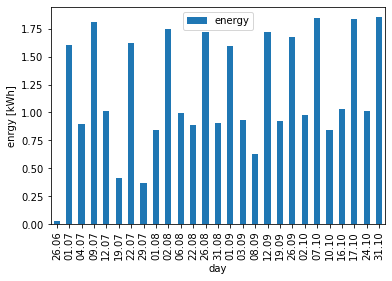

In [79]:
ax = energy_per_day.plot.bar(x='day', y='energy')
ax.set_ylabel("enrgy [kWh]")
# format xtick-labels with list comprehension
ax.set_xticklabels([x.strftime("%d.%m") for x in energy_per_day.day], rotation=90)

In [7]:
path = r'C:\\Users\\janik\\Wolke\\OneDrive\\Documents\\Projekte\\waschmaschine\\training\\'
all_files = glob.glob(path + "\\*.csv")

li = []
i = 0
for filename in all_files:
    i = i + 1
    df = pd.read_csv(filename, index_col=None, header=0, delimiter= ';', decimal= '.')
    li.append(df)

print(i)
data = pd.concat(li, axis=0, ignore_index=True)

27


In [76]:
data = pd.read_csv('C:\\Users\\janik\\Wolke\\OneDrive\\Documents\\Projekte\\waschmaschine\\training\\Waesche_29072021.csv', index_col=None, header=0, delimiter= ';', decimal= '.')

In [8]:
idle = data[(data['current'] < 0.05) & (data['status'] == 0)]
x = idle[['current', 'delta']].to_numpy()

In [9]:
idle[['current', 'delta', 'status']]

,current,delta,status
941,0.049,1882,0
942,0.046,1884,0
953,0.046,1906,0
954,0.045,1908,0
955,0.046,1910,0
...,...,...,...
71185,0.046,5852,0
71186,0.046,5854,0
71187,0.046,5856,0
71188,0.046,5858,0


In [22]:
counter = 0
max = 0
for i in range(1,len(x)):
    if (x[i,1] - x[i-1,1] == 2) & (x[i,1] > 18*60):
        counter = counter + 1
        if counter > max:
            max = counter
    else:
        counter = 0

print(max)

30
